In [1]:
!nvidia-smi

!pip install ultralytics

from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cf8ouYU70K8o0aaWukB5")
project = rf.workspace("arifan").project("dataset_bex")
version = project.version(2)
dataset = version.download("yolov8")


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 523, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'val', 'export', 'predict', 'benchmark', 'track', 'train'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'detect', 'pose', 'obb', 'classify'}
                MODE (required) is one of {'val', 'export', 'predict', 'benchmark', 'track', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [2]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 338MB/s]
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Dataset_BEX-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

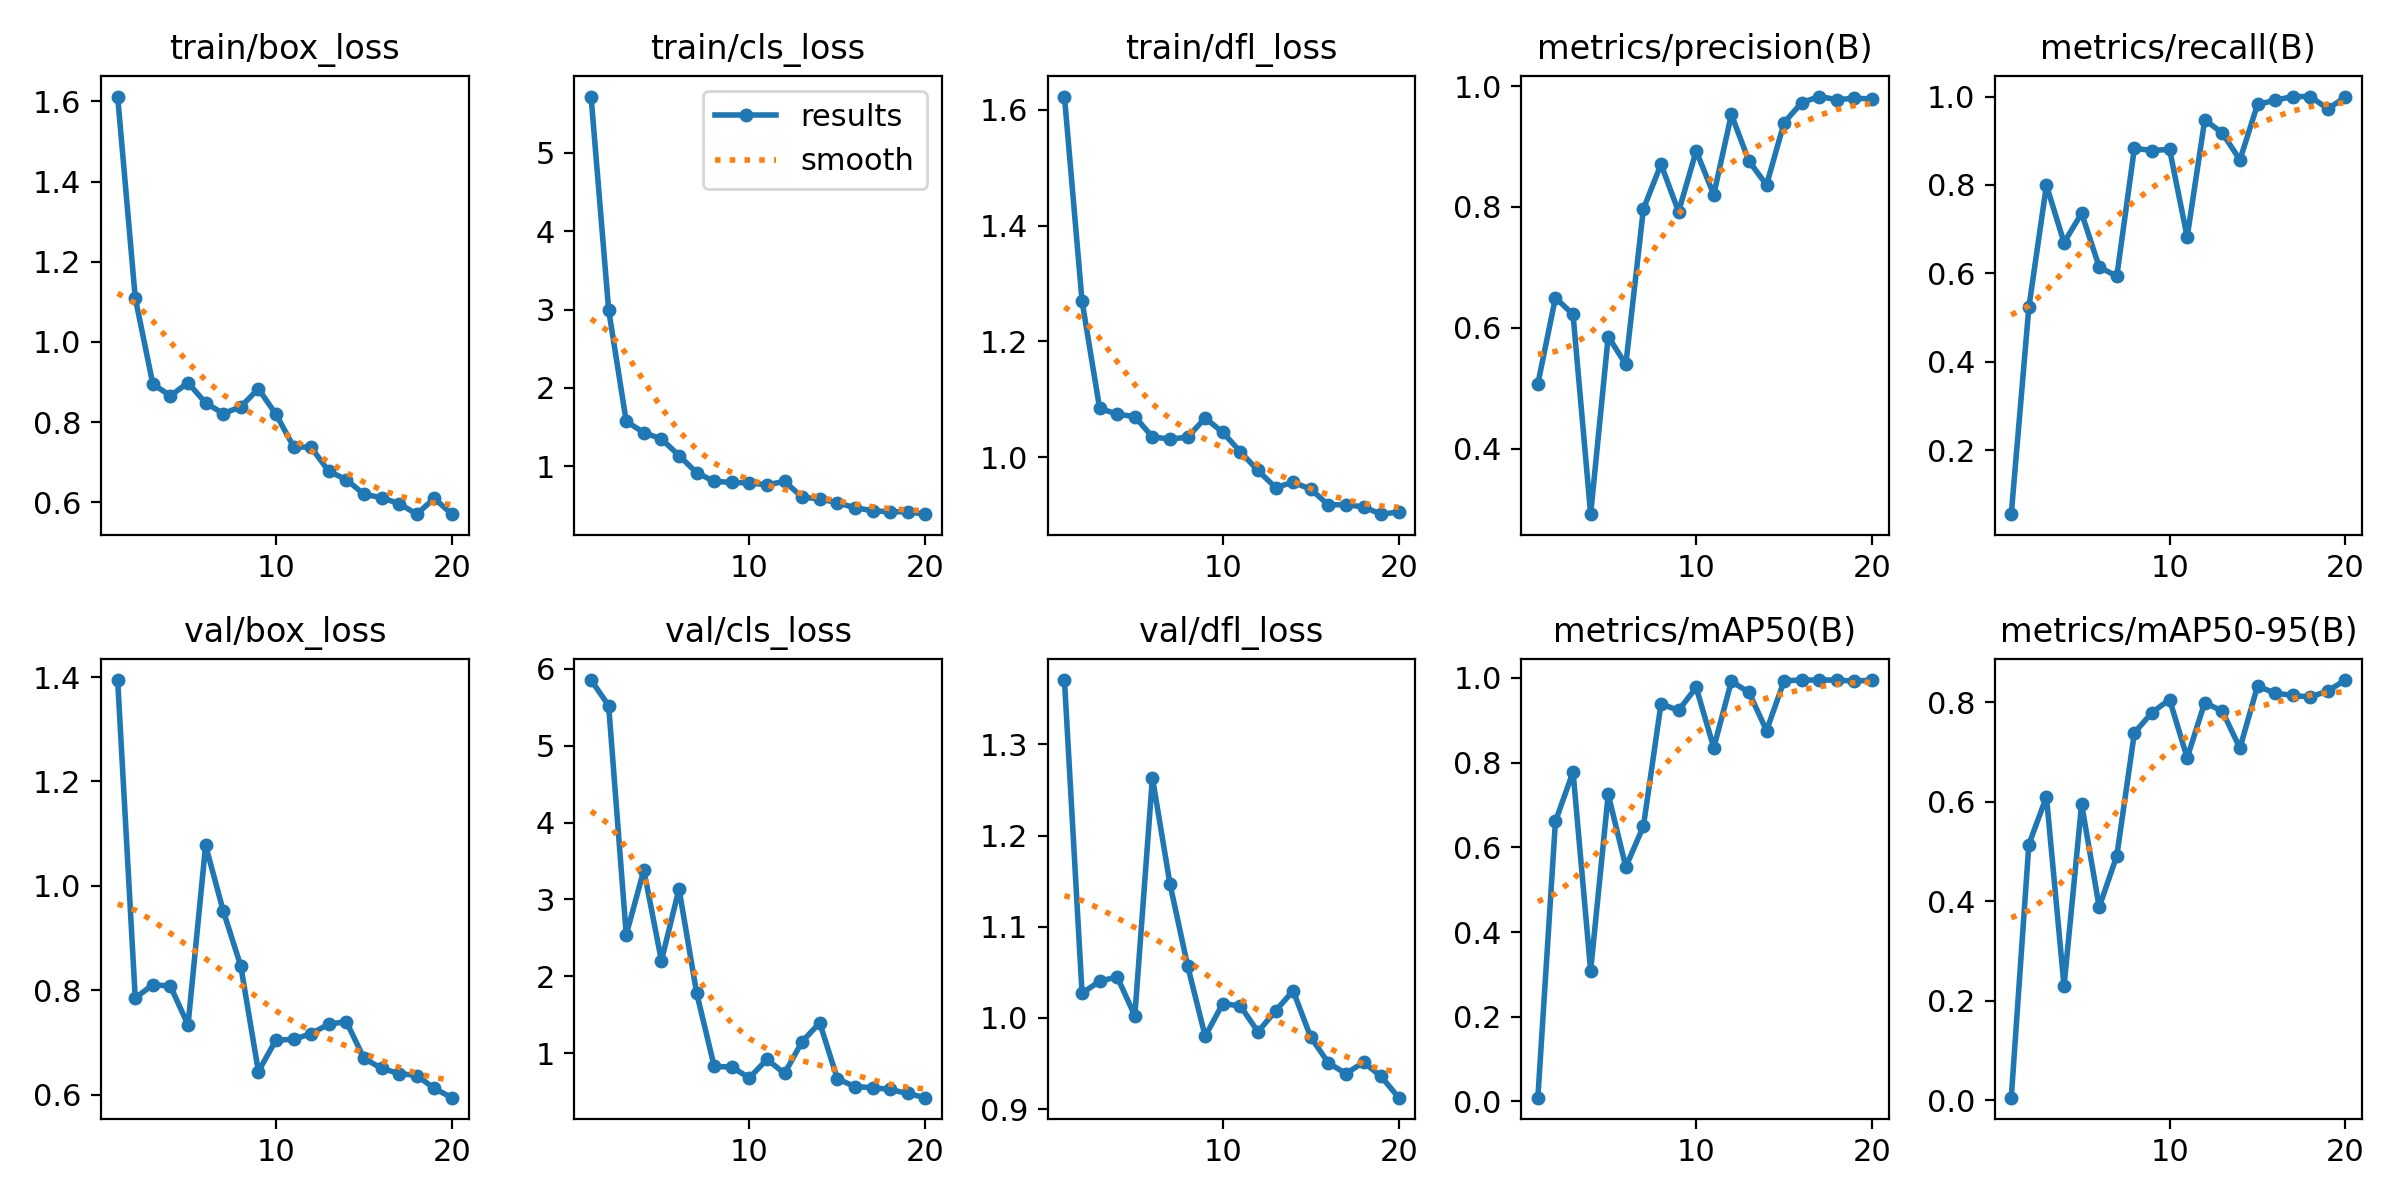

In [3]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [4]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Dataset_BEX-2/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.07s/it]
                   all         25         50      0.979      0.999      0.995      0.845
              LABEL OK         25         16          1      0.997      0.995      0.817
              NO LABEL         25          9      0.964          1      0.995       0.74
           NO SONYBOND         25          9      0.965          1      0.995      0.903
           SONYBOND OK         25         16      0.985          1      0.995      0.921
Speed: 0.2ms preprocess, 33.7ms inference, 0.0ms loss, 27.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https:

In [5]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/17 /content/Dataset_BEX-2/test/images/IMG_20240322_140408_1_jpg.rf.36e88fc94f9855733bcab37aa41a158a.jpg: 640x640 1 NO LABEL, 1 NO SONYBOND, 37.1ms
image 2/17 /content/Dataset_BEX-2/test/images/IMG_20240322_140438_jpg.rf.11174c360206171c829c69573455b9b4.jpg: 640x640 1 NO LABEL, 1 NO SONYBOND, 37.1ms
image 3/17 /content/Dataset_BEX-2/test/images/IMG_20240322_140507_jpg.rf.e659001301a21dd86aee15da2f29f68c.jpg: 640x640 1 NO LABEL, 1 NO SONYBOND, 37.0ms
image 4/17 /content/Dataset_BEX-2/test/images/IMG_20240322_140525_jpg.rf.263ce1a5d424bf5d8bacd546546f89fa.jpg: 640x640 1 NO LABEL, 1 NO SONYBOND, 37.0ms
image 5/17 /content/Dataset_BEX-2/test/images/IMG_20240322_141008_jpg.rf.2d0743902648595b038831eb0cf36d2d.jpg: 640x640 1 LABEL OK, 1 SONYBOND OK, 27.7ms
image 6/17 /content/Dataset_BEX-2/test/images/IMG_20240322_14101

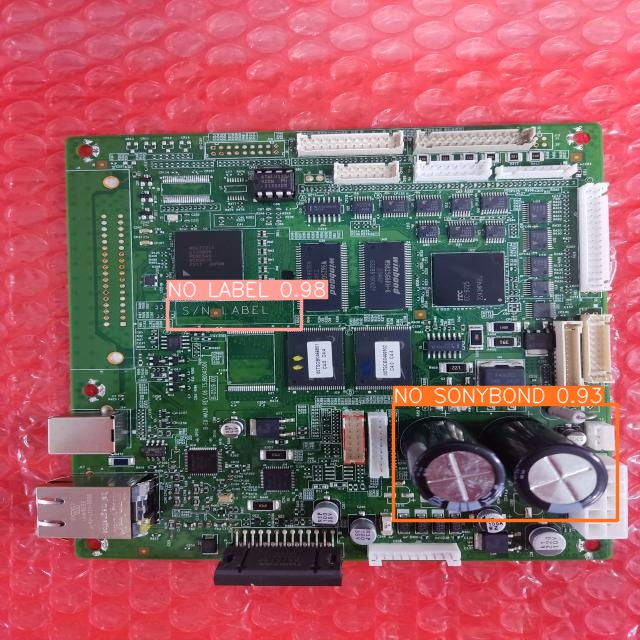

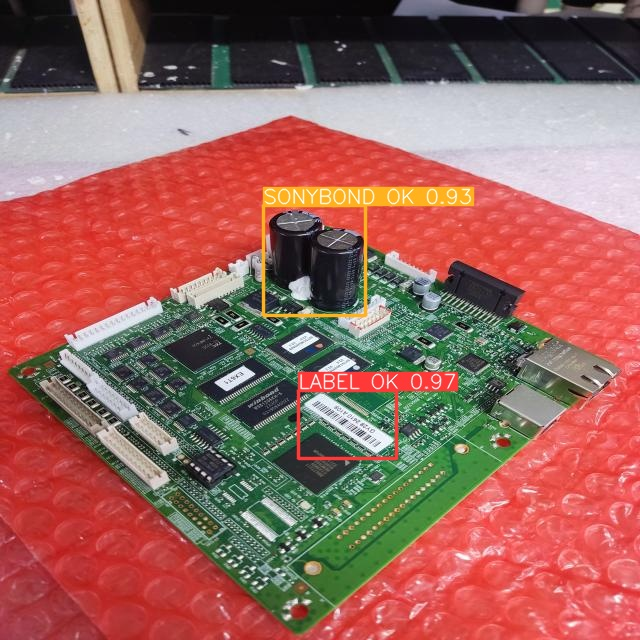

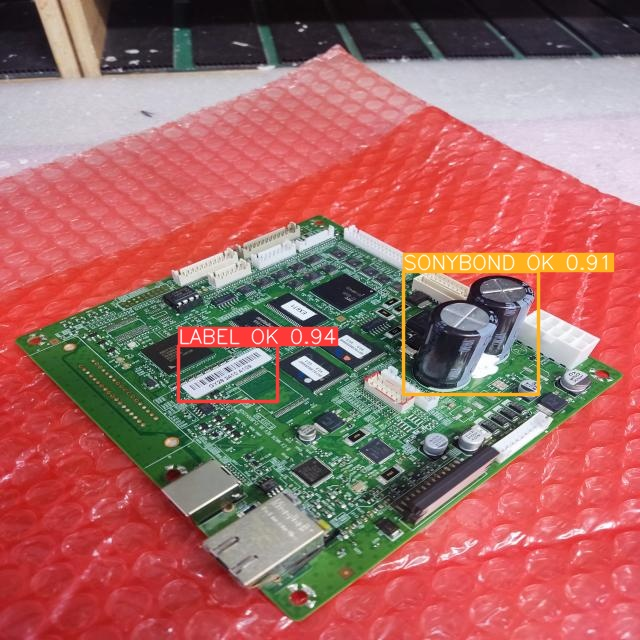

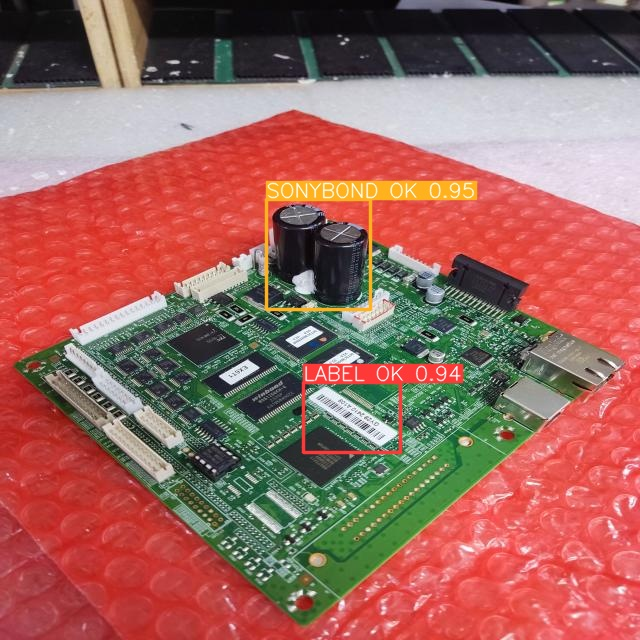

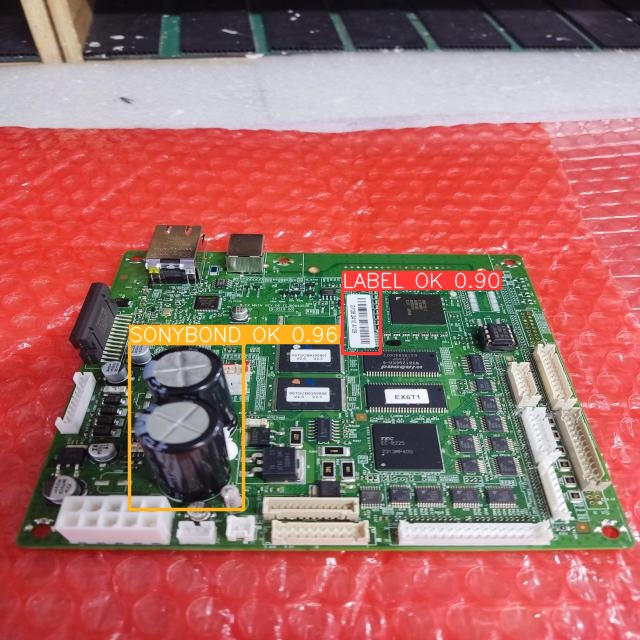

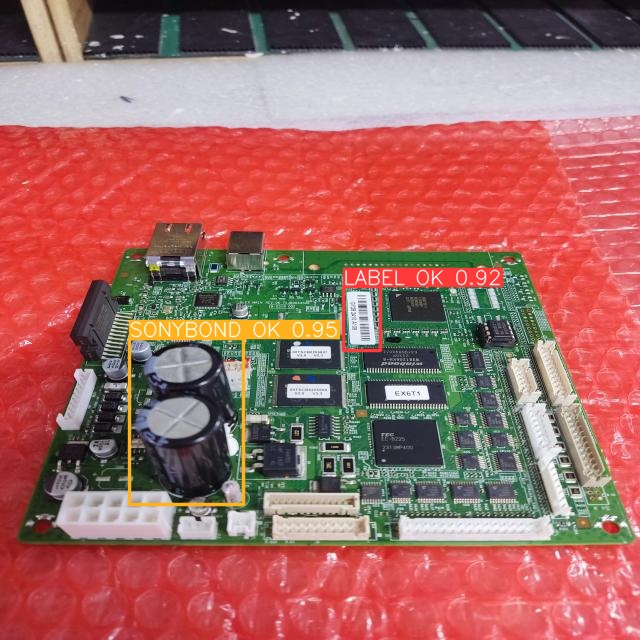

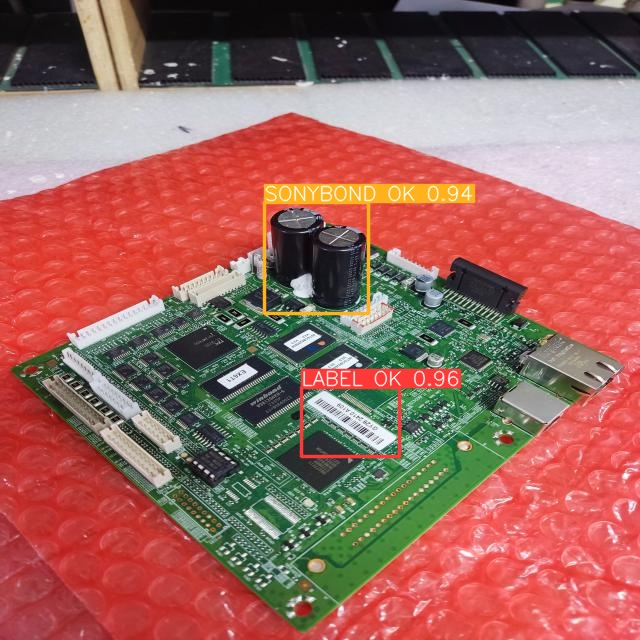

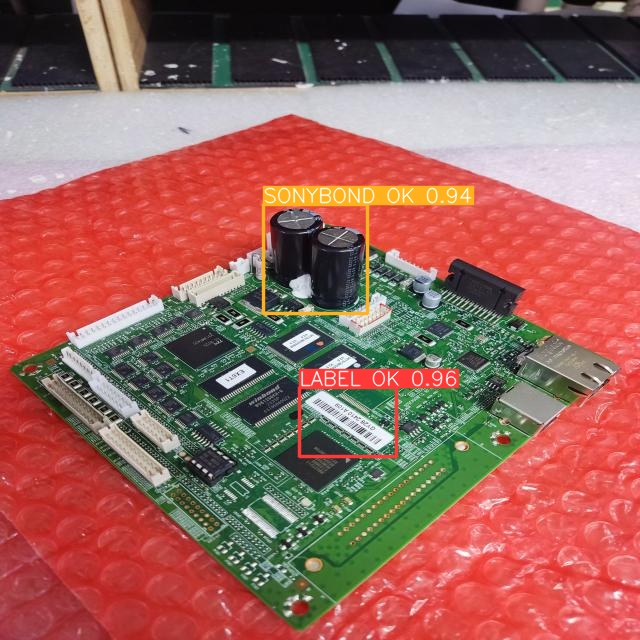

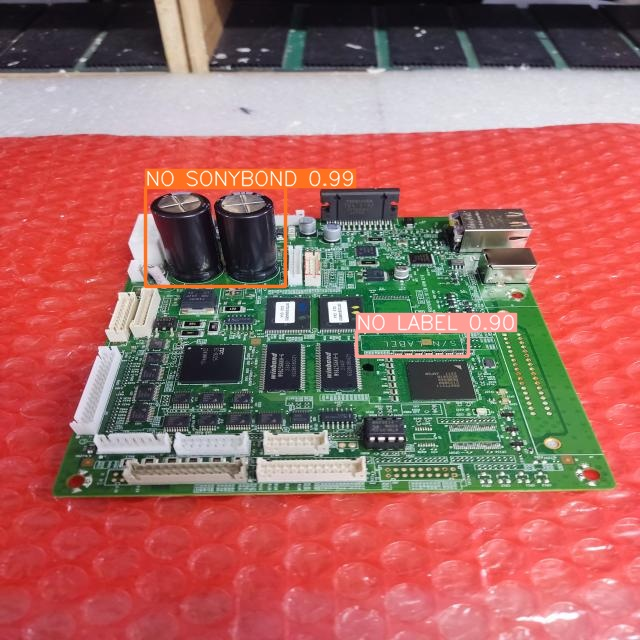

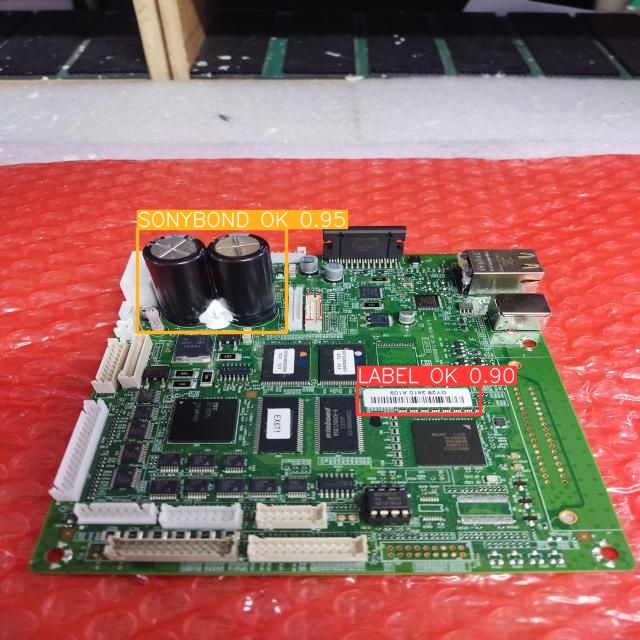

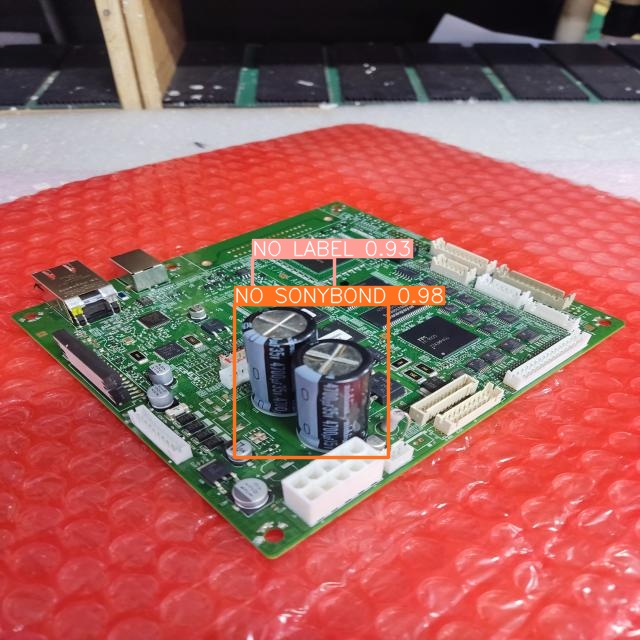

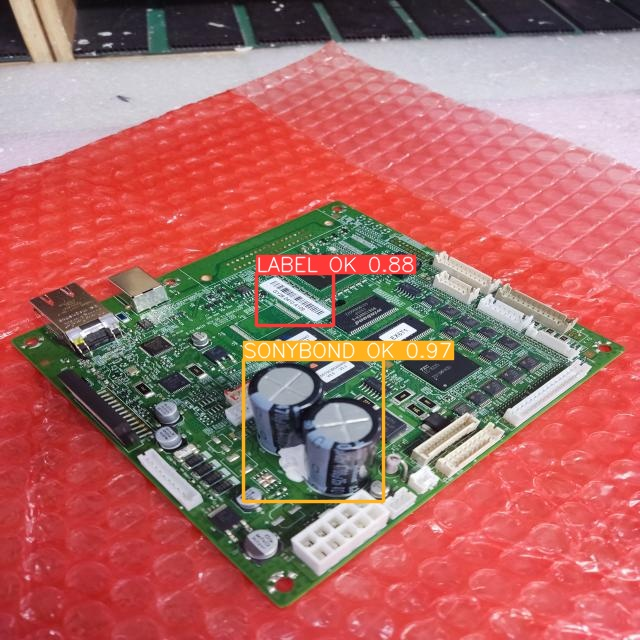

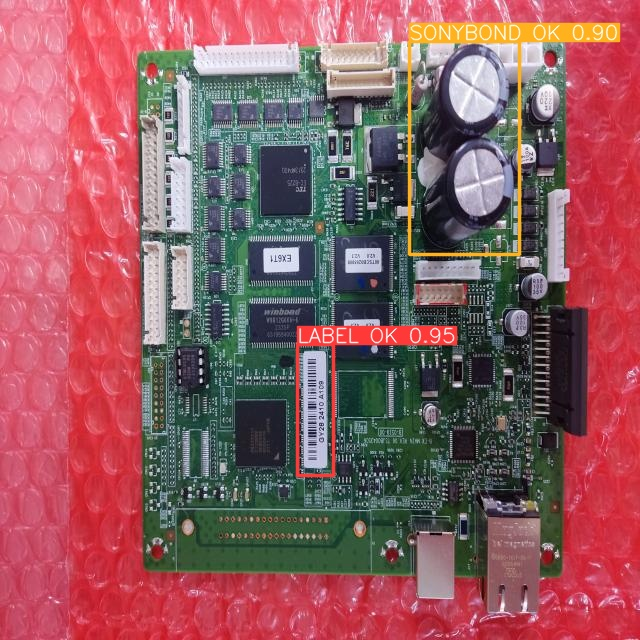

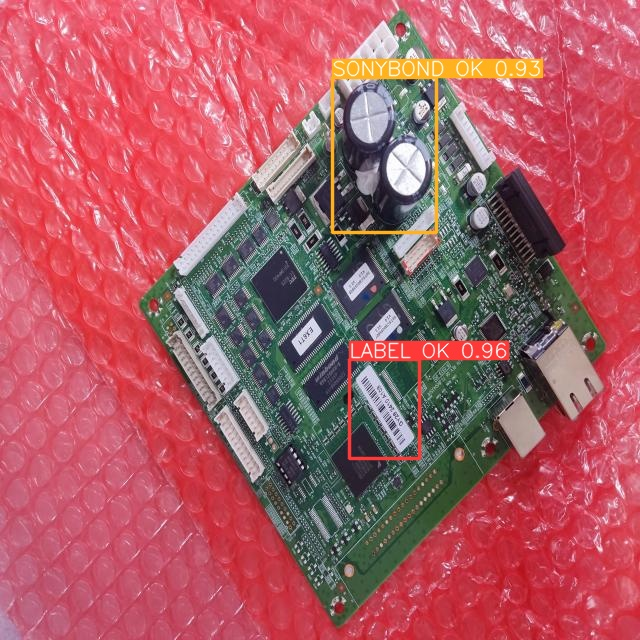

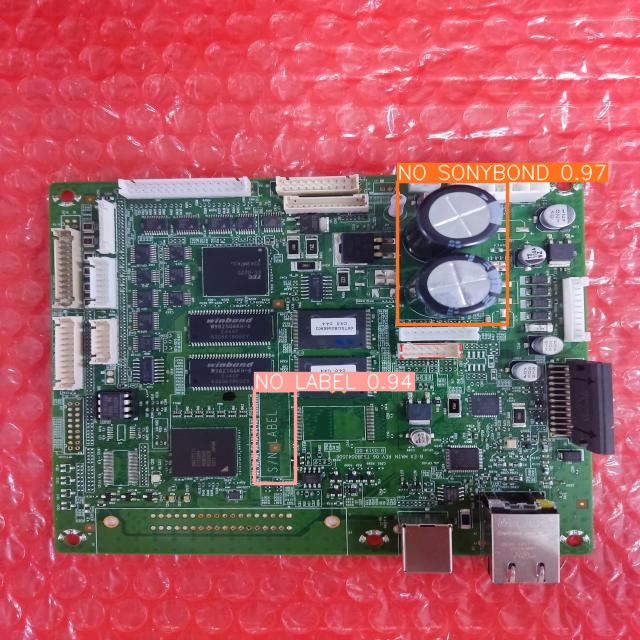

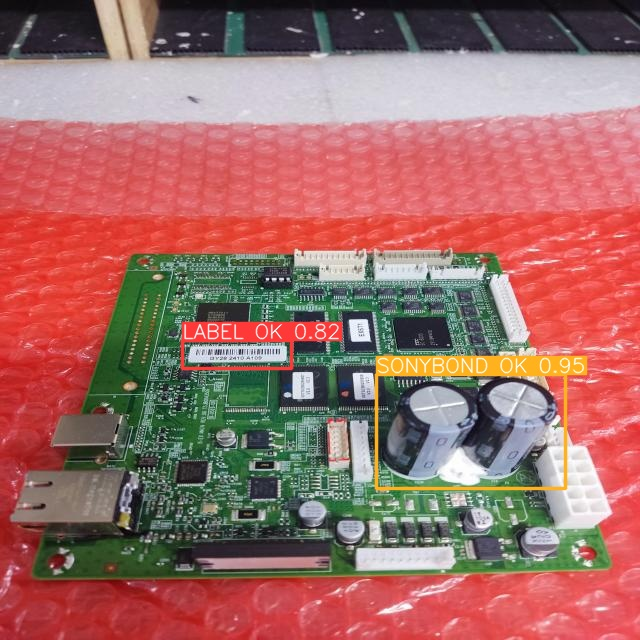

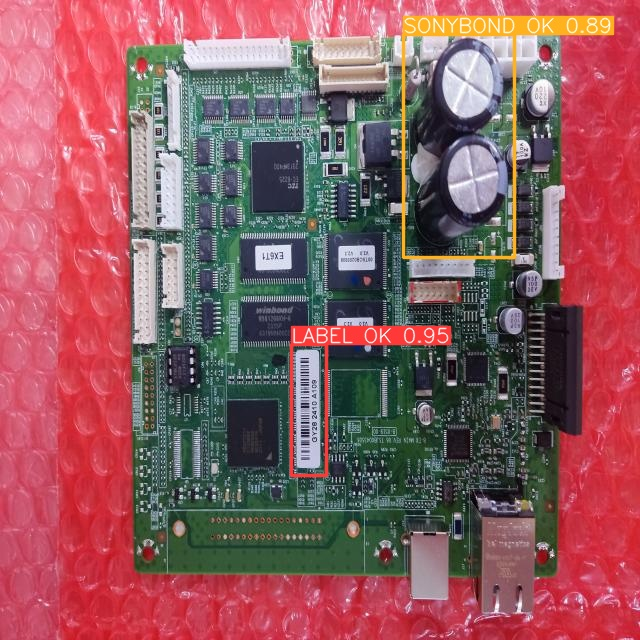

In [6]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [8]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

results = model(source='/content/IMG_20240325_135627.jpg', show=True, conf=0.3, save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 /content/IMG_20240325_135627.jpg: 640x480 1 LABEL OK, 1 SONYBOND OK, 29.4ms
Speed: 4.1ms preprocess, 29.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3
